# Álgebra Lineal Computacional - Práctica 2

## Aritmética de punto flotante. Número de condición.

### Aritmética de punto flotante

#### Ejercicio 7. Algunos experimentos:

Realizar las siguientes operaciones en $\texttt{Python}$. En todos los casos, pensar: ¿cuál es el resultado esperado? ¿coincide con el obtenido? ¿a qué se debe el problema (si lo hay)? (Notamos $\varepsilon$ al épsilon de la máquina. Puede obtenerse importando la librería $\texttt{numpy}$ como $\texttt{np}$ y ejecutando el siguiente comando $\texttt{np.finfo (np.\textcolor{yellow}{float}).eps}$

In [1]:
import numpy as np

In [2]:
p = 1e34
q = 1
p+q-p

0.0

Esperaríamos obtener $1$, pero obtenemos $0$, pues al hacer la suma $1e34 + 1$, obtenemos $1e34$, que al restarse con $1e34$ da $0$. Chequeémoslo:

In [3]:
p+q

1e+34

Efectivamente, pasa eso.

In [4]:
p = 100
q = 1e-15

In [5]:
(p+q)+q

100.0

In [11]:
((p+q)+q)+q

100.0

El error ocurre cuando al hacer el redondeo, por cómo funciona la aritmética de punto flotante, sumarle $1e-15$ a $100$ lo deja en $100$. Recordemos que ni $1e-15$ ni $100$ se expresan de manera exacta en precisión doble pues la base es $b=2$

Veamos cuanto es $\varepsilon$ por curiosidad

In [18]:
np.finfo(np.float64).eps

np.float64(2.220446049250313e-16)

1e-15 es más grande que $\varepsilon$, pero eso no importa, porque la máquina se "come" esos decimales, porque al hacer la suma, $1e-15$ es insignificante al lado de $100$.

In [19]:
0.1+0.2 == 0.3

False

De vuelta, esto ocurre pues $0.1, 0.2,0.3$ quizás no se puedan expresar de manera exacta en base $b=2$.

In [20]:
0.1+0.3==0.4

True

Bueno, acá probablemente deducimos que estos números sí pueden ser bien expresados en base $b=2$ o el error que tenemos es menor que $\varepsilon$.

In [21]:
1e-323

1e-323

In [22]:
1e-324

0.0

Recordemos que el exponente máximo es $b^E -1$, que en precisión doble es $2^{10} -1$

In [25]:
2**10

1024

Es decir, que el número mínimo que podemos expresar es $2^{-1023} \approx 10^{-308}$.

In [28]:
np.finfo(np.float64).min

np.float64(-1.7976931348623157e+308)

Aún así, no entiendo por qué podemos entonces expresar a $1e-323$ y a $1e-324$ no. Según averigué, los menores a $1e-308$ se representan como números desnormalizados o algo así, por lo que se usa directamente $2^{-1022}$ y un dígito más de mantisa o algo así. 

AAAAAAAAAAAAAAAAH creo que ya se, la idea es que podes guardar $0.00000000000000000000000000000000000001 \times 2^{-1022}$ (inclusive más ceros) y eso ya es termina siendo menor que $1e-308$. Ok ok bueno ya caché. Igual preguntar por las dudas.

Entonces la idea sería que el número desnormalizado más chiquito que podemos representar está entre $1e-324$ y $1e-323$.

Sigamos

In [46]:
eps = np.finfo(np.float64).eps
eps

np.float64(2.220446049250313e-16)

In [47]:
eps / 2

np.float64(1.1102230246251565e-16)

El número esperado es el correcto. $\varepsilon$ no es el número más pequeño que podemos representa. Es el número de máquina más grande tal que $1 + \varepsilon  \neq 1$, es decir, que la máquina lo tiene en cuenta para una suma con el 1.

De hecho, si no me equivoco, lo lógico sería que este número sea $2^{-52}$ si no estoy loco (es decir $0.000000...00000001 \times 2^{0}$, pues $1$ debería ser $2^{0}$). Chequeémoslo:

In [41]:
2**(-52)

2.220446049250313e-16

Naaaaa, me siento Gauss, tremendo.

In [48]:
(1 + (eps / 2)) + (eps /2)

np.float64(1.0)

Obviamente, al sumarle a 1, algo menor que $\varepsilon$, devuelve 1. (Dos veces)

In [49]:
1 + ( (eps/2)+(eps/2))

np.float64(1.0000000000000002)

Acá si devuelve algo, porque la suma entre $\frac{\varepsilon}{2}$ y $\frac{\varepsilon}{2}$ es del mismo "orden" y luego sumarle a $1$ el $\varepsilon$ nos da distinto de $1$, como bien nos dice su definición.

In [50]:
((1+(eps/2))+(eps/2))-1

np.float64(0.0)

Lógicamente da $0$. Es $1-1$ (por el orden de las operaciones, obviamente).

In [51]:
(1+((eps/2)+(eps/2)))-1

np.float64(2.220446049250313e-16)

Da $\varepsilon$, la deducción de lo que está pasando acá es la misma que antes.

In [52]:
for j in range(1,26):
    print(np.sin((10**j) * np.pi))
    

-1.2246467991473533e-15
1.964386723728472e-15
-3.2141664592756335e-13
-4.85682353956849e-13
-3.3960653996302193e-11
-2.231912181360871e-10
5.620555424855643e-10
-3.9082928156687315e-08
-3.3201412914529495e-08
-2.2393627619559233e-06
-1.4764233087791559e-05
-0.00026971264011324254
-0.0026971231637969895
-0.011346020891205282
-0.2362090532517409
-0.3752128900123344
-0.8479696810401983
-0.6416534819105048
0.7463367130158111
-0.3940709604247648
-0.5808054397535704
-0.6886746870200211
-0.7965162588457232
0.9301407542552305
0.9948086285918382


In [57]:
np.sin(2*np.pi)

np.float64(-2.4492935982947064e-16)

Bueno, acá es importante notar, que creería que hacer una función seno que sea exacta debe ser fácil, con los conocimientos de Polinomios de Taylor que tenemos, y demás técnicas numéricas que seguro lo permiten calcular con altísima precisión. El tema, es que debe ser imposible de representar $\pi$, un número irracional, de manera exacta en el sistema este, que ya vemos que viene fallando incluso para números racionales. Me imagino que el error va por ahí. A su vez, vemos que a medida que aumentamos el valor del exponente de 10, el error aumenta muchisimo, llegando al extrañísimo resultado de casi $1$ en $10^{25} \pi$, cuando $\sin(10^{25} \pi) = 0$. Esto se puede interpretar, nuevamente, como que cada vez que vamos elevando a un número distinto, vamos moviendo el punto flotante, teniendo cada vez más imprecisión en la representación de $\pi$.

In [59]:
for j in range(1,26):
    print( np.sin((np.pi/2) +(10**j) * np.pi))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999984
0.9999999999999916
0.9999999999987206
0.9999999999468543
0.999999964819047
0.9999949407725442
0.9998070905094508
0.9525593659368664
-0.3752128900123344
-0.8479696810401983
-0.6416534819105048
0.7463367130158111
-0.3940709604247648
-0.5808054397535704
-0.6886746870200211
-0.7965162588457232
0.9301407542552305
0.9948086285918382


Acá vemos que se mantiene bastante la precisión. Quizás $\frac{\pi}{2}$ y sus sumas tienen representaciones mucho más exactas en base $2$ que $\pi$ por algún motivo. Lo importante es que de vuelta al usar exponentes más grandes se va todo al carajo.

#### Ejercicio 8 

Mostrar que una serie divergente de términos que tienden a 0 (e.g. $\sum_n \frac{1}{n}$) podría resultar convergente en aritmética de punto flotante. ¿Qué debería ocurrir para que el resultado númerico sea Inf? ¿Cuál es la mejor estrategia para realizar numéricamente una sumatoria de términos positivos?

In [86]:
sum = np.float32(0)
n = 6
for i in range(1,10**n):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

sum = np.float32(0)
for i in range(1,2*10**n):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

sum = np.float32(0)
for i in range(1,3*10**n):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

sum = np.float32(0)
for i in range(1,4*10**n):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

sum = np.float32(0)
for i in range(1,5*10**n):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

Resultado de la sumatoria: 14.357357
Resultado de la sumatoria: 15.311031
Resultado de la sumatoria: 15.403683
Resultado de la sumatoria: 15.403683
Resultado de la sumatoria: 15.403683


El resultado parece ir convergiendo, sumemos los números al revés. El problema es que sumar cosas del orden de $10$, con cosas del orden de $10^{-6}$, empieza a perder muchos dígitos en la suma como error.

Solucionemos esto sumando de atrás para adelante, cosa de que los errores se acumulen por completo:

In [96]:
sum = np.float32(0)
n = 6
for i in range(10**n,0,-1):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

sum = np.float32(0)
for i in range(40*10**n,0,-1):
    sum += np.float32(1/i)
print("Resultado de la sumatoria:",sum)

Resultado de la sumatoria: 14.392652
Resultado de la sumatoria: 18.257812


Vemos como ahora el resultado va aumentando, pero no da Inf

### Normas matriciales

#### Ejercicio 18

Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{n\times n}$ como el máximo del valor $\|{A}\|_2 / \|x\|_2$ entre varios vectores $x\in\mathbb{R}^{3}$ no nulos generados al azar. Hacer un programa que reciba una matriz $A$ y luego

- genere los primeros 100 términos de la siguiente sucesión:
  
  $ s_1 = 0, s_{k+1} = \max \{s_k , \frac{\|A_{x_k}\|_2}{\|x_k\|_2}\} $

  donde los $x_k \in \mathbb{R}^{3}$ son vectores no nulos generados al azar en la bola unitaria $B=\{x:\|x\|_2\leq 1\}$

- grafique la sucesión calculada, junto con el valor exacto de la norma de la matriz.

Recordar que la norma 2 puede calcularse con el comando $\texttt{np.linalg.norm}$. Tener en cuenta que los vectores generados al azar (comando $\texttt{np.random.random}$ tienen coordenadas en el intervalo $[0,1]$


In [46]:
import numpy as np
import seaborn.objects as so
def sucesion_rara(A):
    s = np.zeros(100)
    x = np.random.rand(100,3)
    for k in range(1,100):
        norma = np.linalg.norm(A@x[k],2) / np.linalg.norm(x[k],2)
        s[k] = max(s[k-1], norma)
    df = pd.DataFrame(s)
    return (
        so.Plot()
        .add(so.Line(),x=df.index,y=df.values.flatten())
        .add(so.Line(color="red"),x=df.index,y=np.linalg.norm(A,2))
    )

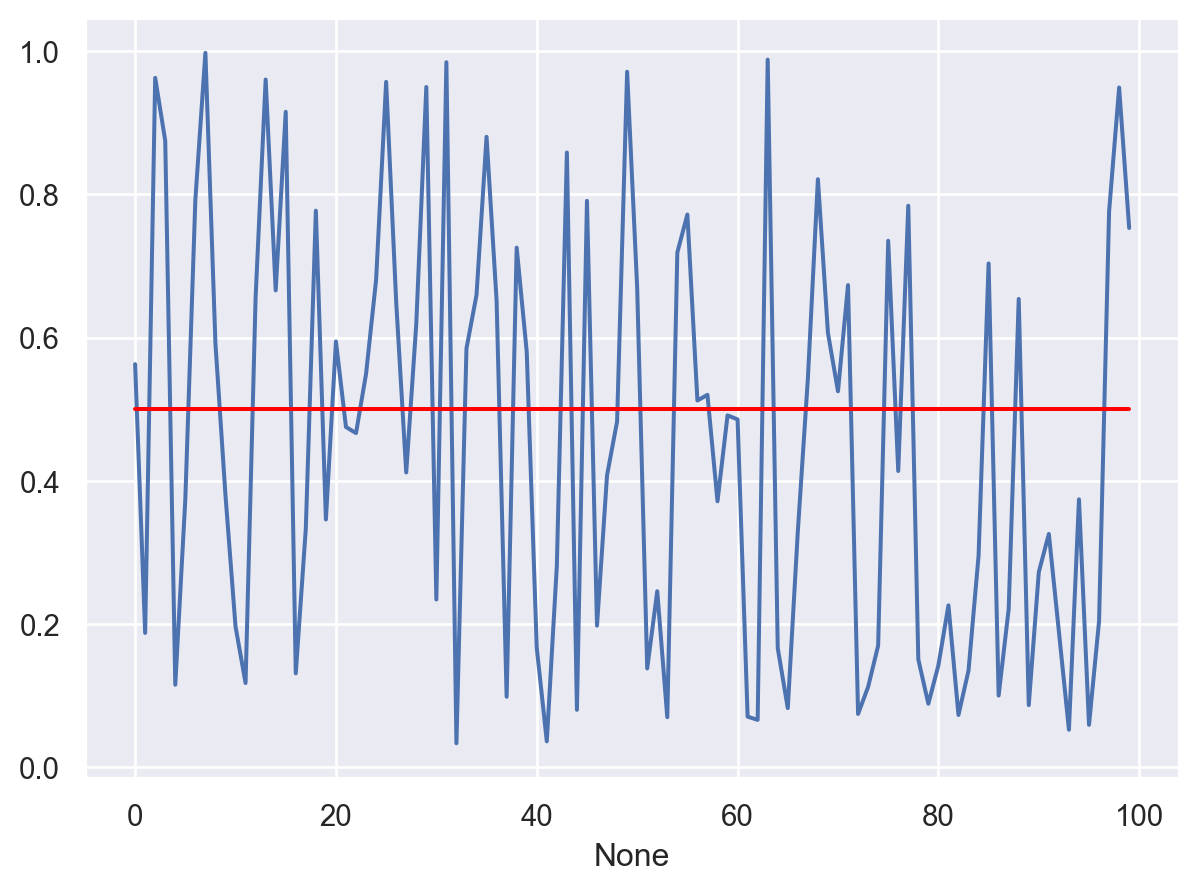

In [33]:
df = pd.DataFrame(test)
(
    so.Plot()
    .add(so.Line(),x = df.index,y=df.values.flatten())
    .add(so.Line(color="red"),x=df.index,y=0.5)
)

In [47]:
f1 = np.array([1,2,3])
f2 = np.array([4,5,6])
f3 = np.array([7,8,9])

X1 = np.array([f1,f2,f3])

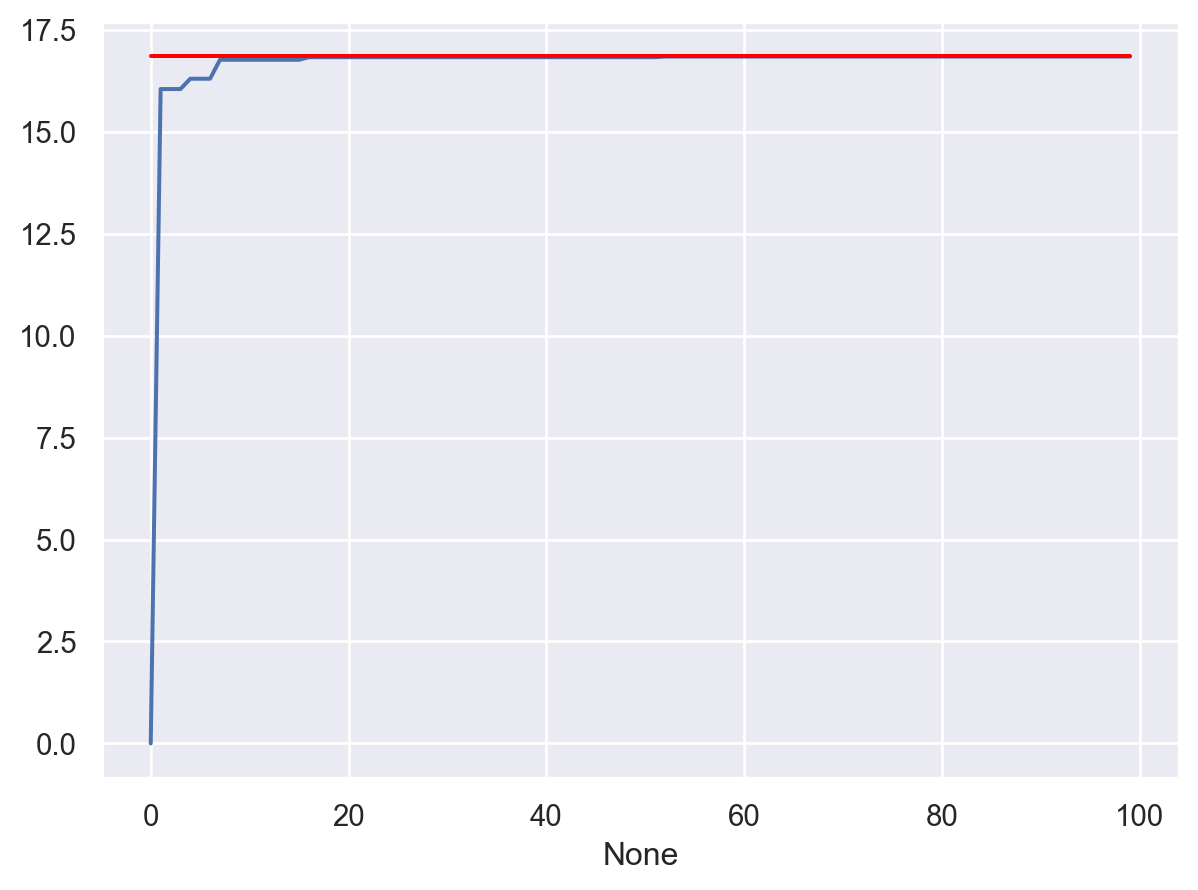

In [48]:
sucesion_rara(X1)

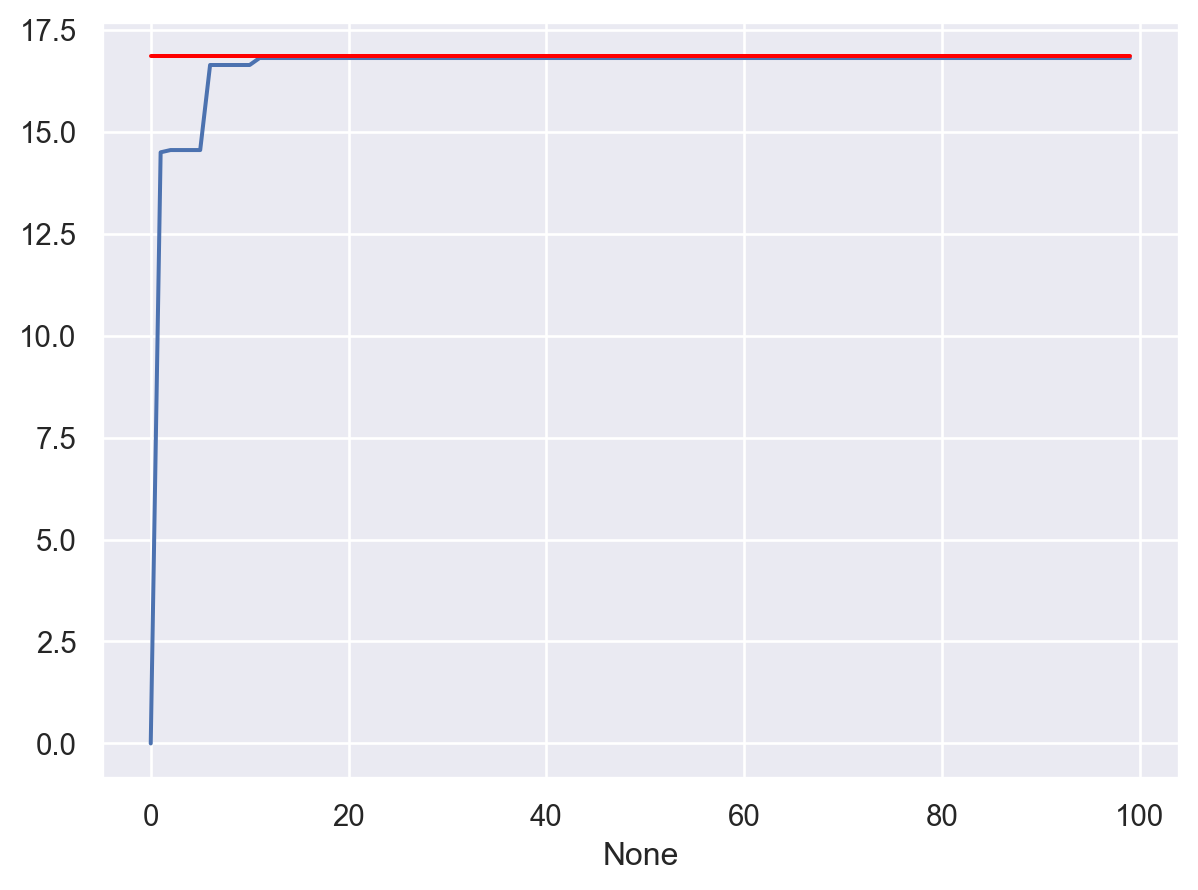

In [49]:
X2 = np.array([f2,f3,f1])
sucesion_rara(X2)

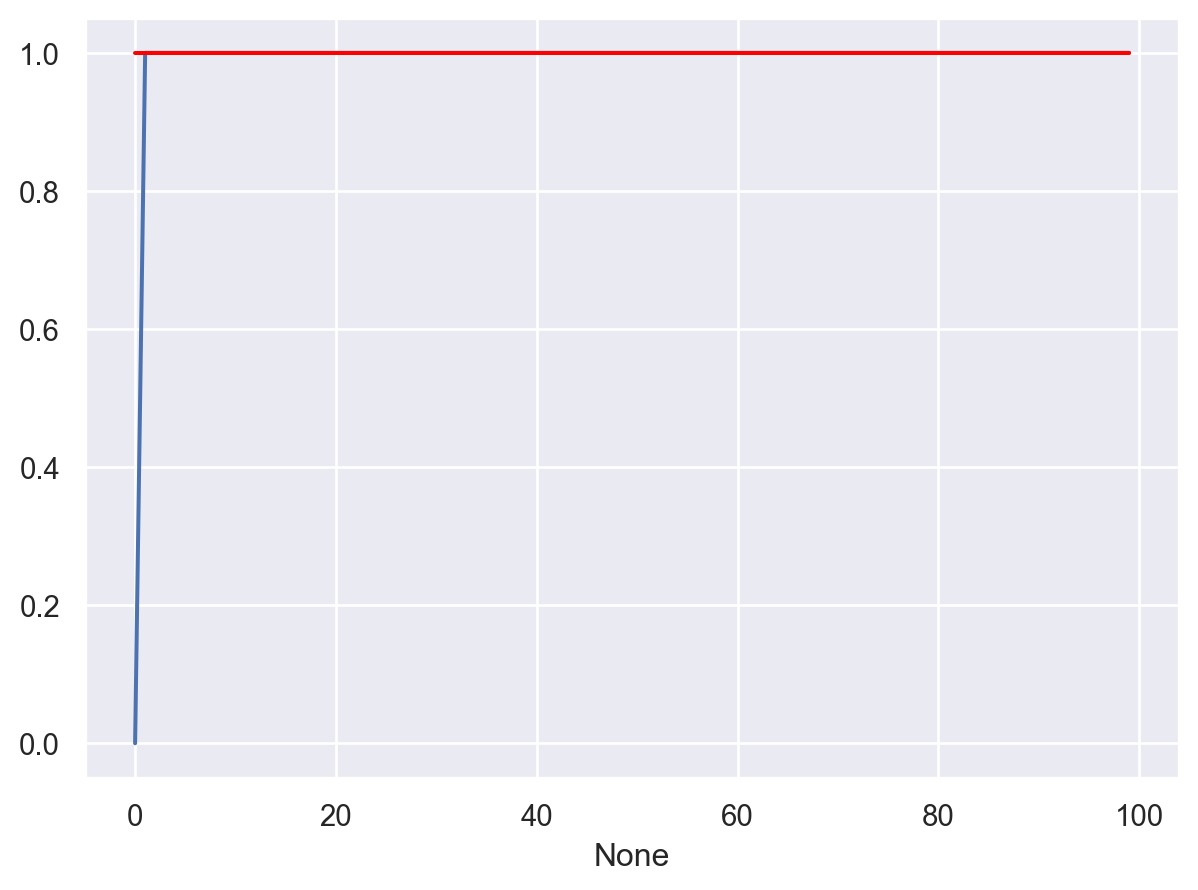

In [50]:
f1 = np.array([1,0,0])
f2 = np.array([0,1,0])
f3 = np.array([0,0,1])

I = np.array([f1,f2,f3])
sucesion_rara(I)

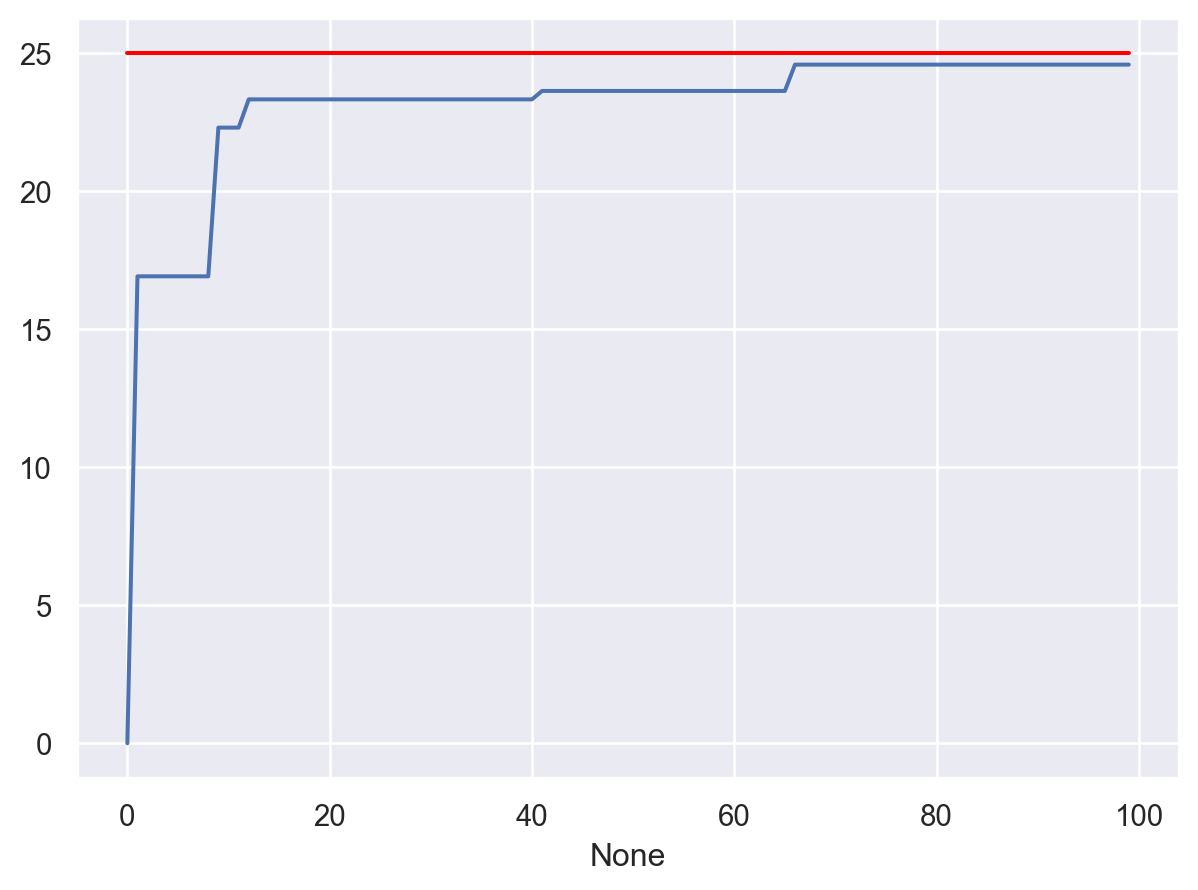

In [53]:
f1 = np.array([25,0,0])
f2 = np.array([0,1,0])
f3 = np.array([0,0,1])

X3 = np.array([f1,f2,f3])
sucesion_rara(X3)

Es interesante como en algunos casos converge más rápido, y en otros menos.

### Condición de matrices

### Ejercicio 20.c

Sea 
$
\begin{equation}
A
=
\begin{pmatrix}
3 & 0 & 0\\
0 & \frac{5}{4} & \frac{3}{4} \\
0 & \frac{3}{4} & \frac{5}{4} 
\end{pmatrix}
\end{equation}
$

Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b = (3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el ítem anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x} = \tilde{b}$ y verificar que $||x-\tilde{x}||<10^{-4}$.

In [1]:
import numpy as np

In [2]:
f1 = np.array([3,0,0])
f2 = np.array([0,5/4,3/4])
f3 = np.array([0,3/4,5/4])

A = np.array([f1,f2,f3])
A

array([[3.  , 0.  , 0.  ],
       [0.  , 1.25, 0.75],
       [0.  , 0.75, 1.25]])

In [3]:
b = np.array([3,2,2])
x = np.array([1,1,1])

In [41]:
def testear_error():
    perturbacion = np.random.rand(1,3) # Genero un vector aleatorio de perturbaciones
    perturbacion = perturbacion.flatten() # Lo achato (np.random devuelve una matriz por default creo)
    perturbacion = perturbacion * (np.linalg.norm(b,ord=np.inf)/60000) # Normalizo a que todos tengan norma menor a ||b||/60000, que es lo que calculé en el item b.
    
    b_tilde = b+perturbacion # perturbo a b
    
    x_tilde = np.linalg.solve(A,b_tilde) # Obtengo la solucion x_tilde

    assert np.linalg.norm(x-x_tilde, ord = np.inf) < 1e-4 # Verifico que la diferencia en norma infinito es menor a 10^-4.

    # Opcional: ||x-x_tilde||_inf con print
    print ( np.linalg.norm(x-x_tilde, ord = np.inf))

In [53]:
testear_error()

1.941165807939349e-05
